In [10]:
#https://www.youtube.com/watch?v=SSmpyoIdJTc

import pandas as pd

df = []
df.append(pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data_max_distance.csv'))
df.append(pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data_walls.csv'))
df.append(pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data_outside.csv'))
df.append(pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data_walls_steel.csv'))


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

def linReg(x_values, y_values, dgr, df):
    X_train, X_test, y_train, y_test = train_test_split(df[x_values], df[y_values])
    X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

    poly = PolynomialFeatures(degree = dgr)
    X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

    model = linear_model.LinearRegression()
    model = model.fit(X_train_poly, y_train)
    coefficient = model.coef_
    intercept = model.intercept_

    response = intercept + coefficient[1] * x_axis
    for i in range(2,dgr+1):
        response += coefficient[i] * x_axis**i

    prediction = model.predict(X_test_poly)
    print(r2_score(prediction, y_test))

    return response

0.8831035752988463
0.8524808633358073
0.9345162057844524
0.6590559547219699
0.9338823807892623


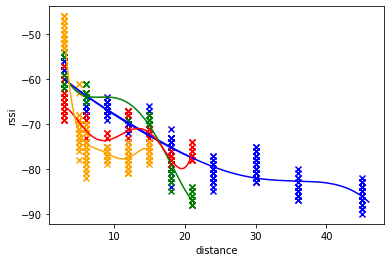

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.arange(3, 46, 0.01)
degrees = [5,4,5,5]

x_values = 'distance'
y_values = 'rssi'

colors = ['blue', 'green', 'red', 'orange', 'purple']

for i in range(0,len(df)):
    plt.scatter(df[i][x_values], df[i][y_values], color=colors[i], marker='x')

response = linReg(x_values, y_values, degrees[0], df[0])
plt.plot(x_axis, response, color=colors[0])

x_axis = np.arange(3, 21, 0.01)
for i in range(0,len(df)):
    if i == 1:
        x_axis = np.arange(3, 21, 0.01)
    if i == 3:
        x_axis = np.arange(3, 15, 0.01)
    response = linReg(x_values, y_values, degrees[i], df[i])
    plt.plot(x_axis, response, color=colors[i])

#plt.plot(x_axis, linReg(x_values, y_values, degree, df), color='b')

#plt.plot(x_axis, linReg(x_values, y_values, degree_02, df_02), color='g')
#plt.plot(x_axis, linReg(x_values, y_values, degree_03, df_03), color='r')


plt.xlabel(x_values)
plt.ylabel(y_values)

plt.savefig(x_values + "-" + y_values + "04-07.png")
#plt.show()